In [6]:

!wget https://s3.ap-south-1.amazonaws.com/discovery-nlp-data/images_level1.npy
!wget https://s3.ap-south-1.amazonaws.com/discovery-nlp-data/labels_level1.npy
!ls
!free -m


Redirecting output to ‘wget-log’.

Redirecting output to ‘wget-log.1’.
images_level1.npy  labels_level1.npy  sample_data  wget-log  wget-log.1
              total        used        free      shared  buff/cache   available
Mem:          13022         463         809         248       11749       12010
Swap:             0           0           0


In [7]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Conv2D
from keras.layers import PReLU
from keras.layers import MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten

import gc
import numpy as np
import pandas as pd

# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import numpy as np
	



Using TensorFlow backend.


In [8]:

# input image dimensions
img_rows, img_cols = 100,100#200,200

# number of channels
img_channels = 1

immatrix = np.load('images_level1.npy')
print (immatrix.shape)
labal = np.load('labels_level1.npy')
print (labal.shape)

#labal=np.array(labal)
data,Label = shuffle(immatrix,labal, random_state=4)
train_data = [data,Label]

del immatrix,labal
gc.collect()

#batch_size to train
batch_size = 60
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 100

(X, y) = (train_data[0],train_data[1])
del train_data
gc.collect()
# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=4)
del X, y
gc.collect()

X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
import time
 
# time.sleep(5)
print X_train.shape[0]
# n = X_train.shape[0]
# d1 = X_train[:, :n/2].astype('float')
# d2 = X_train[:, n/2:].astype('float')
# X_train = np.hstack(d1, d2)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= (256)
X_val /= (256)
X_test /= (256)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = y_train#np_utils.to_categorical(y_train, nb_classes)
Y_val = y_val#np_utils.to_categorical(y_val, nb_classes)
Y_test = y_test#np_utils.to_categorical(y_test, nb_classes)

del y_train,y_val,y_test

(27587, 30000)
(27587, 3)
22096
('X_train shape:', (22096, 3, 100, 100))
(22096, 'train samples')
(2759, 'test samples')


In [31]:
# del hist
del model
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        5709         266         387        7046        8223
Swap:             0           0           0


In [0]:

model = Sequential() 		
model.add(Convolution2D(128, (3, 3),input_shape=(3,img_rows,img_cols)))
model.add(PReLU(alpha_initializer = 'zeros',weights = None))
#model.add(BatchNormalization())
model.add(Convolution2D(128, (3, 3), data_format='channels_first'))
#model.add(Dropout(0.5))	
model.add(PReLU(alpha_initializer = 'zeros',weights = None))
#model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))
	

model.add(Convolution2D(64, (3, 3), data_format='channels_first'))
#model.add(Dropout(0.5))	
model.add(PReLU(alpha_initializer='zeros',weights = None))
#model.add(BatchNormalization())

# model.add(Convolution2D(64, (3, 3), data_format='channels_first'))
# #model.add(Dropout(0.5))	
# model.add(PReLU(alpha_initializer='zeros',weights = None))
#model.add(BatchNormalization()) 
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256))
model.add(PReLU(alpha_initializer = 'zeros',weights = None))
#model.add(Dropout(0.5))		
num_classes=3
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [35]:
# print Y_train
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))


from sklearn.utils import class_weight
# class_weight = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
# hist = model.fit(X_train, Y_train, batch_size=200, epochs=8, verbose=1, validation_data=(X_val, Y_val),class_weight = d_class_weights)
hist = model.fit(X_train, Y_train, batch_size=225, epochs=8, verbose=1, validation_data=(X_val, Y_val))
           


Train on 22096 samples, validate on 2732 samples
Epoch 1/8
22096/22096 [==============================] - 115s 5ms/step - loss: 0.4388 - acc: 0.8449 - val_loss: 0.3838 - val_acc: 0.8536
Epoch 2/8
22096/22096 [==============================] - 111s 5ms/step - loss: 0.3590 - acc: 0.8622 - val_loss: 0.3781 - val_acc: 0.8536
Epoch 3/8
22096/22096 [==============================] - 111s 5ms/step - loss: 0.3566 - acc: 0.8623 - val_loss: 0.3733 - val_acc: 0.8536
Epoch 4/8
22096/22096 [==============================] - 111s 5ms/step - loss: 0.3533 - acc: 0.8623 - val_loss: 0.3910 - val_acc: 0.8536
Epoch 5/8
22096/22096 [==============================] - 111s 5ms/step - loss: 0.3515 - acc: 0.8621 - val_loss: 0.4371 - val_acc: 0.8536
Epoch 6/8
22096/22096 [==============================] - 111s 5ms/step - loss: 0.3524 - acc: 0.8619 - val_loss: 0.3696 - val_acc: 0.8514
Epoch 7/8
22096/22096 [==============================] - 111s 5ms/step - loss: 0.3509 - acc: 0.8622 - val_loss: 0.3693 - val_acc:

In [43]:


score = model.evaluate(X_test, Y_test,batch_size=225, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
# print(model.predict_classes(X_test[1:5]))
# print(Y_test[1:5])


# Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict_classes(X_test)
p=model.predict_proba(X_test) # to predict probability
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

2759/2759 [==============================] - 5s 2ms/step
('Test score:', 0.340634874899606)
('Test accuracy:', 0.8637187375500394)
             precision    recall  f1-score   support

    class 0       0.71      0.01      0.03       378
    class 1       0.00      0.00      0.00         1
    class 2       0.86      1.00      0.93      2380

avg / total       0.84      0.86      0.80      2759

[[   5    0  373]
 [   0    0    1]
 [   2    0 2378]]


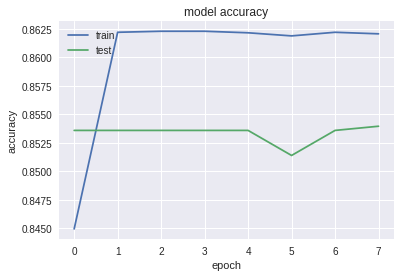

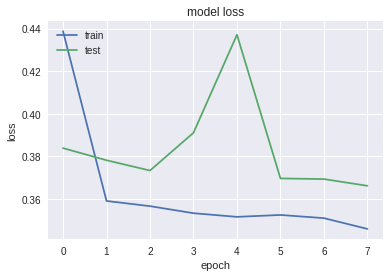

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
model.save_weights("model.h5")
from google.colab import files
files.download("model.h5")

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 38078, 0, 0)
----------------------------------------


Traceback (most recent call last):
  File "/usr/lib/python2.7/SocketServer.py", line 290, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python2.7/SocketServer.py", line 318, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python2.7/SocketServer.py", line 331, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python2.7/SocketServer.py", line 654, in __init__
    self.finish()
  File "/usr/lib/python2.7/SocketServer.py", line 713, in finish
    self.wfile.close()
  File "/usr/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/usr/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
